<a href="https://colab.research.google.com/github/krithusrinivasan/EDA-Assignments/blob/main/db_scan_assignment_penguins_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
import matplotlib.pyplot as plt

##Loading Dataset

In [ ]:
data= pd.read_csv('/content/penguins.csv')

##Summarizing Data

In [ ]:
data.head(10)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE
6,38.9,17.8,181.0,3625.0,FEMALE
7,39.2,19.6,195.0,4675.0,MALE
8,34.1,18.1,193.0,3475.0,NaN
9,42.0,20.2,5000.0,4250.0,MALE


In [ ]:
data.shape

(344, 5)

In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


## Performing EDA

In [ ]:
data.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [ ]:
data.duplicated().sum()

1

In [ ]:
data_1 = data.drop_duplicates()

In [ ]:
data_1.shape

(343, 5)

In [ ]:
data_1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
data_1.isnull().sum()

culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

In [ ]:
data_clean = data_1.dropna(how='all')
data_clean.shape

(342, 5)

In [ ]:
data_clean.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

In [ ]:
most_frequent_sex = data_clean['sex'].mode()[0]
data_clean['sex'].fillna(most_frequent_sex, inplace=True)

<ipython-input-18-ea5807765f34>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['sex'].fillna(most_frequent_sex, inplace=True)


In [ ]:
data_clean.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
data_clean.dtypes

culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
data_clean.reset_index(drop=True, inplace=True)

##Removing Unnecessary columns

In [ ]:
data_clean.head()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [ ]:
# removing sex column.
df= data_clean.drop('sex',axis=1)

In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


## Dataset Convertion - Dataframe to Array



In [ ]:
df_array = df.values

In [ ]:
df_array

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

## Applying Standardization to the Dataset

In [ ]:
scale = StandardScaler()

In [ ]:
x = scale.fit_transform(df_array)

In [ ]:
x

array([[-0.88449874,  0.78544923, -0.126893  , -0.56414208],
       [-0.81112573,  0.1261879 , -0.1076753 , -0.50170305],
       [-0.66437972,  0.43046236, -0.07308344, -1.18853234],
       ...,
       [ 1.18828874, -0.73592307,  0.03069212,  1.93341896],
       [ 0.23443963, -1.19233476, -0.00774327,  1.24658968],
       [ 1.09657248, -0.53307343, -0.00389973,  1.49634578]])

## Loading the Model

In [ ]:
df.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

In [ ]:
model = DBSCAN(min_samples=3)

In [ ]:
model

DBSCAN(min_samples=3)

## Training the Model

In [ ]:
model.fit(x)

DBSCAN(min_samples=3)

## Displaying the Labels

In [ ]:
model.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  2,
        2,  2,  2,  2,  2

In [ ]:
set(list(model.labels_))

{-1, 0, 1, 2}

This data set has got 3 clusters (0,1,2).

In [ ]:
df['cluster'] = model.labels_
df['cluster'].value_counts()


cluster
 0    202
 2    117
-1     20
 1      3
Name: count, dtype: int64

In [ ]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])

In [ ]:
class_

,cluster_values
0,0
1,0
2,0
3,0
4,0
...,...
337,2
338,2
339,2
340,2


## Merging the clustervalues to the Entire Dataset

In [ ]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0
...,...,...,...,...
337,47.2,13.7,214.0,4925.0
338,46.8,14.3,215.0,4850.0
339,50.4,15.7,222.0,5750.0
340,45.2,14.8,212.0,5200.0


In [ ]:
final_df = pd.concat([df,class_],axis=1)

In [ ]:
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,2
338,46.8,14.3,215.0,4850.0,2
339,50.4,15.7,222.0,5750.0,2
340,45.2,14.8,212.0,5200.0,2


## Generating Inference

In [ ]:
final_df['cluster_values'].unique()

array([ 0, -1,  1,  2])

In [ ]:
final_df[final_df['cluster_values']==-1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
8,42.0,20.2,5000.0,4250.0,-1
13,34.6,21.1,-132.0,4400.0,-1
18,46.0,21.5,194.0,4200.0,-1
72,45.8,18.9,197.0,4150.0,-1
80,42.9,17.6,196.0,4700.0,-1
82,35.1,19.4,193.0,4200.0,-1
108,43.2,19.0,197.0,4775.0,-1
159,46.0,18.9,195.0,4150.0,-1
167,50.3,20.0,197.0,3300.0,-1
168,58.0,17.8,181.0,3700.0,-1


In [ ]:
final_df[final_df['cluster_values']==0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,36.7,19.3,193.0,3450.0,0
4,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
213,45.7,17.0,195.0,3650.0,0
215,43.5,18.1,202.0,3400.0,0
216,49.6,18.2,193.0,3775.0,0
217,50.8,19.0,210.0,4100.0,0


In [ ]:
final_df[final_df['cluster_values']==1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
180,52.8,20.0,205.0,4550.0,1
188,52.0,20.7,210.0,4800.0,1
190,53.5,19.9,205.0,4500.0,1


In [ ]:
final_df[final_df['cluster_values']==2]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,cluster_values
219,46.1,13.2,211.0,4500.0,2
220,50.0,16.3,230.0,5700.0,2
221,48.7,14.1,210.0,4450.0,2
222,50.0,15.2,218.0,5700.0,2
223,47.6,14.5,215.0,5400.0,2
...,...,...,...,...,...
337,47.2,13.7,214.0,4925.0,2
338,46.8,14.3,215.0,4850.0,2
339,50.4,15.7,222.0,5750.0,2
340,45.2,14.8,212.0,5200.0,2


In [ ]:
input_x = final_df.iloc[:,:-1].values

In [ ]:
input_x

array([[  39.1,   18.7,  181. , 3750. ],
       [  39.5,   17.4,  186. , 3800. ],
       [  40.3,   18. ,  195. , 3250. ],
       ...,
       [  50.4,   15.7,  222. , 5750. ],
       [  45.2,   14.8,  212. , 5200. ],
       [  49.9,   16.1,  213. , 5400. ]])

In [ ]:
output_y = final_df.iloc[:,-1].values

In [ ]:
output_y

array([ 0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,
        0,  1, -1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  2,  2,
        2,  2,  2,  2,  2

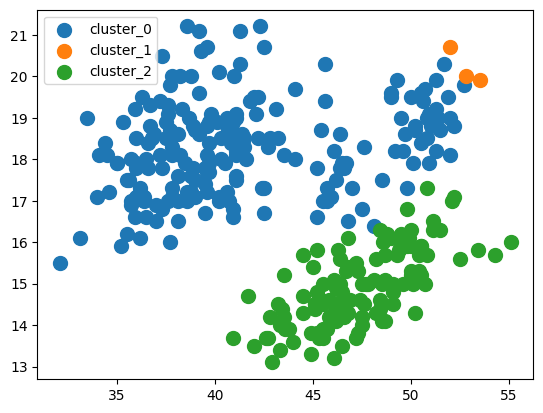

In [ ]:
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,0],input_x[output_y==2,1],s=100, label='cluster_2')
plt.legend()
plt.show()

## Conclusion

    We have got three clusters in this data and limited number of Noisy points.